In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
from glob import glob
import yaml
from chatcaptioner.utils import print_info, plot_img, RandomSampledDataset

In [5]:
# specify SAVE_PATH to visualize the result you want
SAVE_PATH = 'experiments/test/'
DATA_ROOT = 'datasets/'

          artemis          
Image ID vieira-portuense_leda-e-o-cisne-1798
-------------------
FlanT5 XXL ChatCaptioner:
I have an image. Ask me questions about the content of this image. Carefully asking me informative questions to maximize your information about this image content. Each time ask one question only without giving an answer. Avoid asking yes/no questions.I'll put my answer beginning with "Answer:".
Question: Describe this image in detail.
Answer: a painting of a woman and a man in a landscape
Question: What is the ethnicity of the woman and man in the painting?
Answer: not sure
Question: What is the landscape depicted in the painting?
Answer: a forest
Question: What is the color scheme of the painting?
Answer: blues and greens
Question: What is the woman wearing in the painting?
Answer: a dress
Question: What is the woman doing in the painting?
Answer: laying down
Question: What is the man doing in the painting?
Answer: laying down
Question: What is the pose of the woman

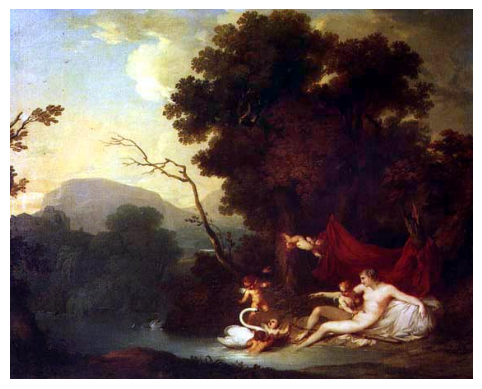

Image ID camille-pissarro_the-harvest-at-montfoucault-2-1876
-------------------
FlanT5 XXL ChatCaptioner:
I have an image. Ask me questions about the content of this image. Carefully asking me informative questions to maximize your information about this image content. Each time ask one question only without giving an answer. Avoid asking yes/no questions.I'll put my answer beginning with "Answer:".
Question: Describe this image in detail.
Answer: a painting of people working in a field
Question: What is the setting of the painting?
Answer: a field
Question: What kind of work are the people doing in the field?
Answer: haying
Question: What is the weather like in the painting?
Answer: sunny
Question: What kind of landscape is visible in the background of the painting?
Answer: a field
Question: What kind of attire are the people in the painting wearing?
Answer: a hat
Question: What is the predominant color of the painting?
Answer: green
Question: What is the position of the sun in the p

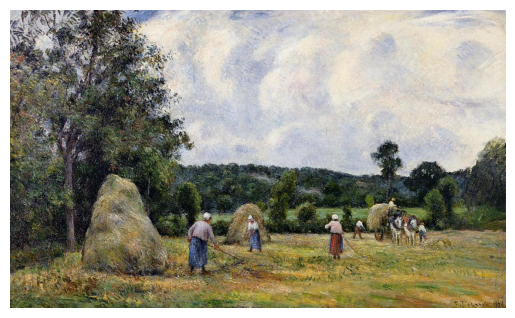

Image ID joshua-reynolds_the-marlborough-family-1778
-------------------
FlanT5 XXL ChatCaptioner:
I have an image. Ask me questions about the content of this image. Carefully asking me informative questions to maximize your information about this image content. Each time ask one question only without giving an answer. Avoid asking yes/no questions.I'll put my answer beginning with "Answer:".
Question: Describe this image in detail.
Answer: A painting of a family with dogs
Question: What is the setting of the painting?
Answer: A room with a table and chairs
Question: What is the composition of the family in the painting?
Answer: A man, a woman, and two children
Question: What is the ethnicity of the people in the painting?
Answer: English
Question: What is the color scheme of the painting?
Answer: black, white, and red
Question: What are the dogs doing in the painting?
Answer: playing with the children
Question: What are the ages of the children in the painting?
Answer: ages of the chi

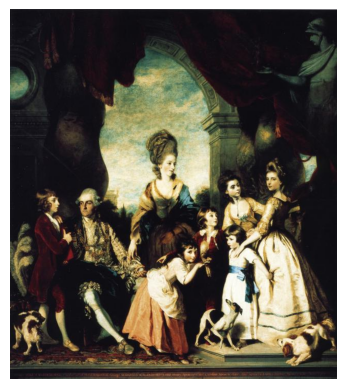

Image ID filippo-lippi_birth-and-naming-st-john-1465
-------------------
FlanT5 XXL ChatCaptioner:
I have an image. Ask me questions about the content of this image. Carefully asking me informative questions to maximize your information about this image content. Each time ask one question only without giving an answer. Avoid asking yes/no questions.I'll put my answer beginning with "Answer:".
Question: Describe this image in detail.
Answer: The painting shows a woman and her children in a room
Question: What is the woman in the painting wearing?
Answer: a white dress
Question: What is the woman doing in the painting?
Answer: preparing the baby for burial
Question: What is the expression on the woman's face?
Answer: sad
Question: What are the ages of the children in the painting?
Answer: not sure
Question: What is the color scheme of the painting?
Answer: not sure
Question: What is the setting of the room in the painting?
Answer: not sure
Question: What is the ethnicity of the woman in 

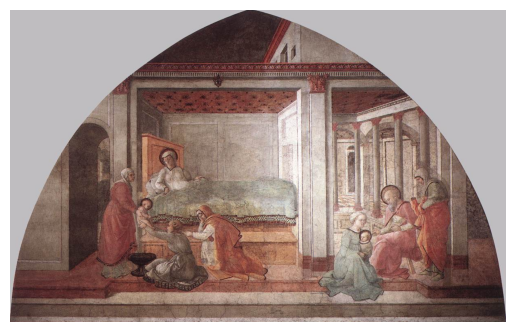

Image ID aubrey-beardsley_a-child-at-its-mother-s-bed
-------------------
FlanT5 XXL ChatCaptioner:
I have an image. Ask me questions about the content of this image. Carefully asking me informative questions to maximize your information about this image content. Each time ask one question only without giving an answer. Avoid asking yes/no questions.I'll put my answer beginning with "Answer:".
Question: Describe this image in detail.
Answer: A woman is holding a cat and a man is holding a dog
Question: What is the woman wearing in the image?
Answer: a dress
Question: What is the color of the dress the woman is wearing?
Answer: black
Question: What is the breed of the dog held by the man in the image?
Answer: a dachshund
Question: What is the color of the cat held by the woman in the image?
Answer: black
Question: What is the expression on the woman's face in the image?
Answer: a look of concern
Question: What is the background of the image?
Answer: a room with a christmas tree
Question

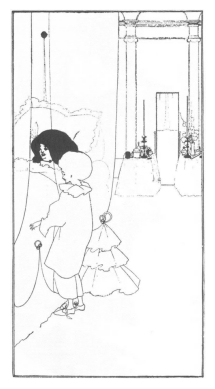

Image ID jamie-wyeth_the-islander-1976
-------------------
FlanT5 XXL ChatCaptioner:
I have an image. Ask me questions about the content of this image. Carefully asking me informative questions to maximize your information about this image content. Each time ask one question only without giving an answer. Avoid asking yes/no questions.I'll put my answer beginning with "Answer:".
Question: Describe this image in detail.
Answer: A sheep is standing on a hill looking at the ocean
Question: What is the color of the sheep's wool?
Answer: yellow
Question: What is the color of the ocean in the background?
Answer: blue
Question: What is the shape of the hill on which the sheep is standing?
Answer: a sloping hill
Question: What is the weather like in the image?
Answer: it is cloudy
Question: Are there any other animals in the image?
Answer: no
Question: What is the position of the sheep's head?
Answer: looking to the left
Question: What is the position of the sheep's legs?
Answer: standing on t

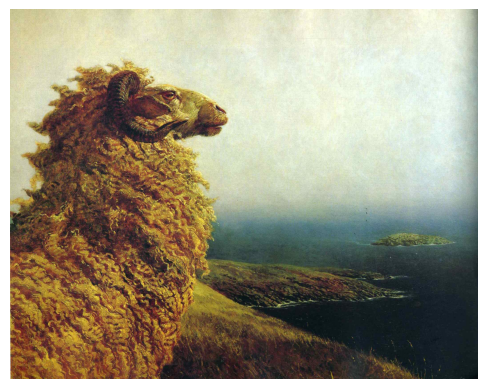

Image ID kay-nielsen_they-pulled-up-the-princesses
-------------------
FlanT5 XXL ChatCaptioner:
I have an image. Ask me questions about the content of this image. Carefully asking me informative questions to maximize your information about this image content. Each time ask one question only without giving an answer. Avoid asking yes/no questions.I'll put my answer beginning with "Answer:".
Question: Describe this image in detail.
Answer: a painting of three women in white dresses walking in a desert
Question: What is the color of the sky in the background of the image?
Answer: blue
Question: What is the facial expression of the women in the painting?
Answer: sad
Question: What is the landscape like in the background of the painting?
Answer: a desert
Question: What is the time of day depicted in the painting?
Answer: night
Question: What is the position of the women in the painting?
Answer: standing
Question: What is the body language of the women in the painting?
Answer: holding hands

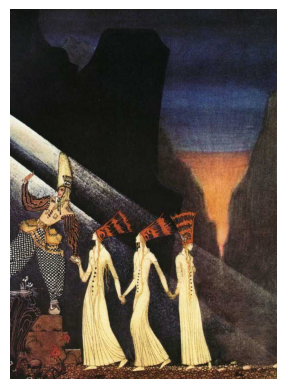

In [6]:
datasets_list = os.listdir(SAVE_PATH)
for dataset_name in datasets_list:
    print('============================')
    print('          {}          '.format(dataset_name))
    print('============================')
    dataset = RandomSampledDataset(DATA_ROOT, dataset_name)
    
    save_infos = glob(os.path.join(SAVE_PATH, dataset_name, 'caption_result', '*'))
    for info_file in save_infos:
        with open(info_file, 'r') as f:
            info = yaml.safe_load(f)
        img_id = info['id'] if 'id' in info else info['setting']['id']
        test_img, _ = dataset.fetch_img(img_id)
        print_info(info, key='chat')
        plot_img(test_img)